<a href="https://colab.research.google.com/github/Srinishaa/GRIP-tasks/blob/Task1/Prediction_using_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Task 1-Prediction using Supervised ML.**

---





# Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics  

# Constants

In [ ]:
url='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
regression=LinearRegression()

In [ ]:
data=pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Plotting relationship between Hours studied and Score obtained

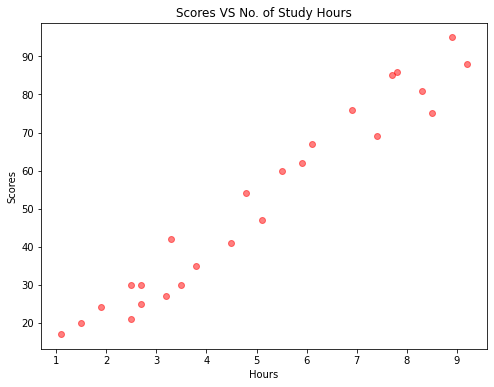

In [ ]:
X=pd.DataFrame(data,columns=['Hours'])
y=pd.DataFrame(data,columns=['Scores'])
plt.figure(figsize=(8,6))
plt.scatter(X,y,alpha=0.5,color='red')
plt.title('Scores VS No. of Study Hours')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

# Splitting data into testing and training sets

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Training the model

In [ ]:
regression.fit(X_train,y_train)
coef=regression.coef_[0][0]
intercept=regression.intercept_[0]
print('Regression coeff',coef)
print('Regression intercept',intercept)
print('Regression Score',regression.score(X,y))

Regression coeff 10.150184482669022
Regression intercept 1.0025203970274816
Regression Score 0.9512960769143008


# Plotting regression graph for trained data

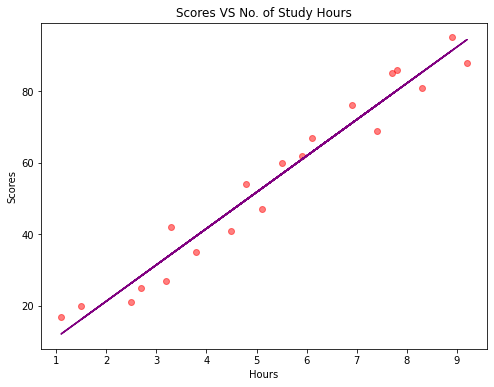

In [ ]:
X=pd.DataFrame(data,columns=['Hours'])
y=pd.DataFrame(data,columns=['Scores'])
plt.figure(figsize=(8,6))
plt.scatter(X_train,y_train,alpha=0.5,color='red')
plt.title('Scores VS No. of Study Hours')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.plot(X_train,regression.predict(X_train),color='purple')
plt.show()

# Testing the model

In [ ]:
def predictScore(hour):
  return coef*hour + intercept

In [ ]:
y_pred=X_test.apply(predictScore).Hours
y_pred
y_test.head()
df = pd.DataFrame({'Actual': y_test.Scores, 'Predicted': y_pred}) 
df

,Actual,Predicted
4,30,36.528166
16,30,26.377982
17,24,20.287871
20,30,28.408019
3,75,87.279088


# Testing with own data

In [ ]:
print('Score obtained when hours studied is 9.25 ->',predictScore(9.25))

Score obtained when hours studied is 9.25 -> 94.89172686171594


# Evaluating the model

In [ ]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 5.546676713610148
